# Credit Card Default Prediction

## 1. Problem Statement

- The goal is to predict the probability of credit default based on credit card owner's characteristics and payment history.

## 2. Dataset overview

- We have total 25 columns with 30,000 entries or tuples.
- Dataset : UCI MACHINE LEARNING (https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset)

## Import Required Libraries 

In [251]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use("seaborn-muted")

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE
from collection import Counter

from sklearn import metrics 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

import xgboost as xgb

import pickle

##  Import CSV Dataset as Pandas DataFrame

In [252]:
df = pd.read_csv('UCI_Credit_Card.csv')

### Show top 5 records

In [253]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Shape of the Dataset

In [254]:
df.shape

(30000, 25)

### Dataset Information

 | Column | Description |
 | :- | :- |
 |__ID__ | ID of each client |
 |__LIMIT_BAL__ | Amount of given credit in NT dollars (includes individual and family/supplementary credit |
 |__SEX__ | Gender |
 |__EDUCATION__ |Level of education |
 |__MARRIAGE__ | Marital status |
 |__AGE__ |  Age in years |
 |__PAY__ | History of their past payments made (April to September) (g1 to g6)
 |__BILL_AMT__ | Amount of bill statement (h1 to h6) |
 |__PAY_AMT__ | Amount of previous payment (i1 to i6) |
 |__default.payment.next.month__ | Default payment (1=yes, 0=no) |

## 3. Data Cleaning

- Check Null Values
- Check Duplicate Values
- Check Data Type of each column
- Check statistics
- Check and drop unnecessary columns
- Check unique values of categorical columns

### Check Null Values

In [255]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

 * There are no null or missing values.

### Check Duplicates

In [256]:
df.duplicated().sum()

0

- There are no duplicate values.

### Check Data Type

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

- Here, All columns has numerical data type.

### Check Statistics  of data 

In [258]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


- Here, ID columns has no contribute to predict target so we can drop that columns.

### Drop and Rename

In [259]:
df.drop('ID',axis=1,inplace=True)
df.rename({'default.payment.next.month' : 'isDefault','PAY_0':'PAY_1'},axis=1,inplace=True)

### Check unique values 

In [260]:
df.nunique()

LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_1           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
isDefault        2
dtype: int64

### Converting numerical features to categorical features

- As,we can see here some of the columns like sex,education and marriage has less number of unique values. 
- so, we can convert them into Categorical Feature.
- Also, Target Feature has binary class.

In [261]:
#1=male, 2=female

df['SEX']=df['SEX'].map({1 : 'male' , 2 : 'female'})
df['SEX'].value_counts()

female    18112
male      11888
Name: SEX, dtype: int64

In [262]:
#1=married, 2=single, 3=others

df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [263]:
# here, we have some 0 which are not detemine so adding that values in others category.

df.loc[df['MARRIAGE'] == 0 , 'MARRIAGE']=3
df['MARRIAGE']=df['MARRIAGE'].map({1:'married', 2:'single', 3:'others'})
df['MARRIAGE'].value_counts()

single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64

In [264]:
# 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown

df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [265]:
# here, merge 0,4,5,6 category as 4 category which is others.

fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)

df.loc[fil , 'EDUCATION'] = 4
df['EDUCATION'] = df['EDUCATION'].map({1:'graduate school', 2:'university', 3:'high school', 4:'others'})
df['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4917
others               468
Name: EDUCATION, dtype: int64

## 4. Data Visualization

- Take a visualization on Target variable. As, It has binary class.

In [266]:
df[['isDefault']].value_counts(normalize=True)*100

isDefault
0            77.88
1            22.12
dtype: float64

Text(0.5, 1.0, 'Count of Defaulters')

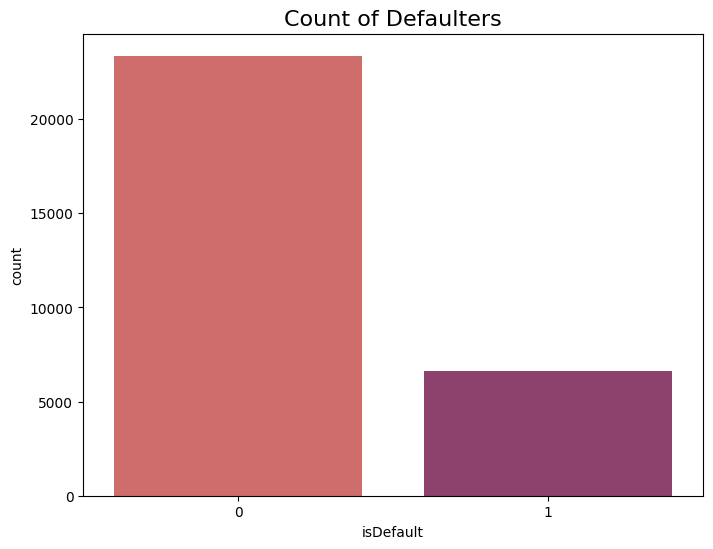

In [267]:
plt.figure(figsize=(8,6))
sns.countplot(x='isDefault',data=df,palette='flare')
plt.title('Count of Defaulters',fontsize=16)

- Here, we have Imbalanced Data in Target Variable.

<Axes: xlabel='isDefault', ylabel='LIMIT_BAL'>

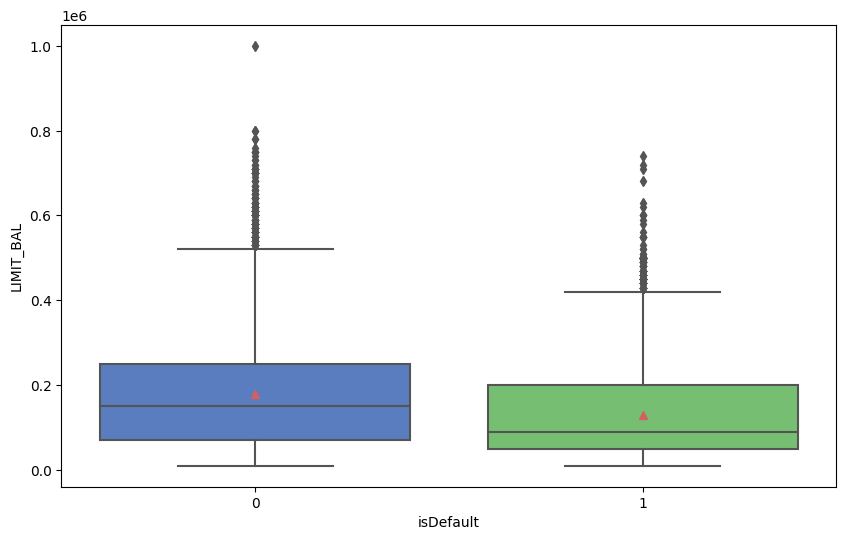

In [268]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['isDefault'],y=df['LIMIT_BAL'],showmeans=True)

<Axes: xlabel='isDefault', ylabel='LIMIT_BAL'>

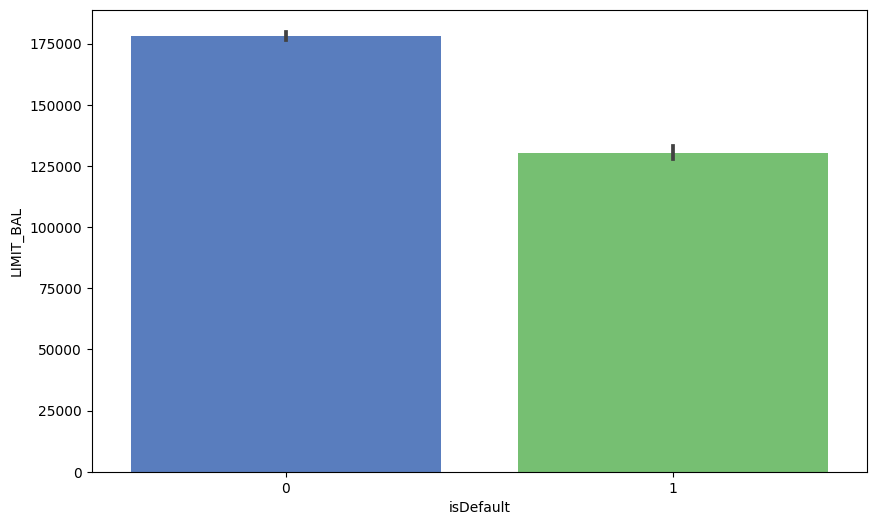

In [269]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['isDefault'],y=df['LIMIT_BAL'])

- Here, we can see that people with higher credit limit have significantly lower default proportion.

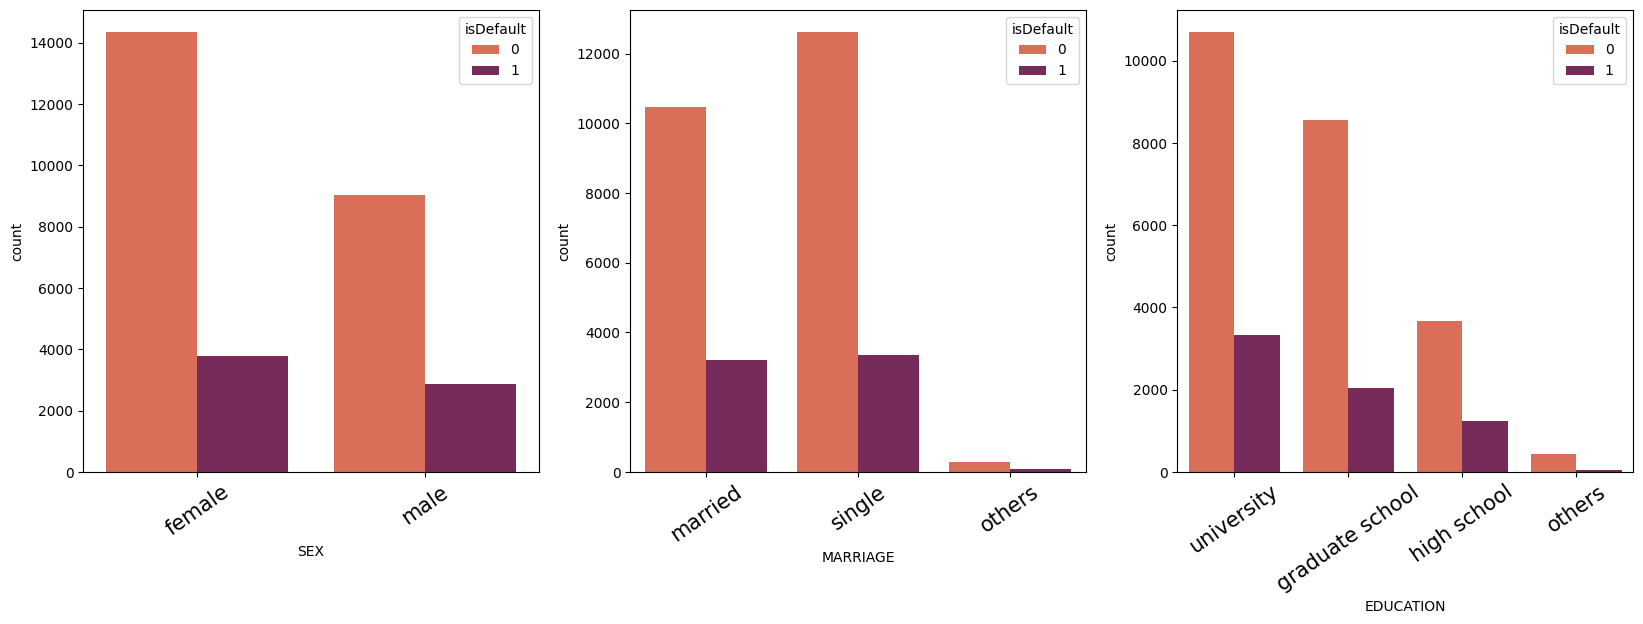

In [270]:
col=['SEX','MARRIAGE','EDUCATION']

plt.figure(figsize=(20,6))
for i in range(len(col)):
    plt.subplot(1,3,i+1)
    plt.xticks(fontsize=15,rotation=35)
    sns.countplot(x=col[i],hue='isDefault',palette='rocket_r',data=df)

- Here, we can observed from categorical features

    1) There are more number of Female Card holder so that there is more no. of defaulter.  
    2) No. of defaulters are higher propotion of Singles.  
    3) No. of defaulters are higher propotion of high educated peoples. (graduate school and university)

In [271]:
def dist_plot(col):
    
    sns.distplot(df.loc[df.isDefault == 0, col], label = 'Not Default')
    sns.distplot(df.loc[df.isDefault == 1, col], label = 'Default')
    plt.legend()
    plt.title('{}'.format(col), fontsize = 15, fontweight = 'bold')

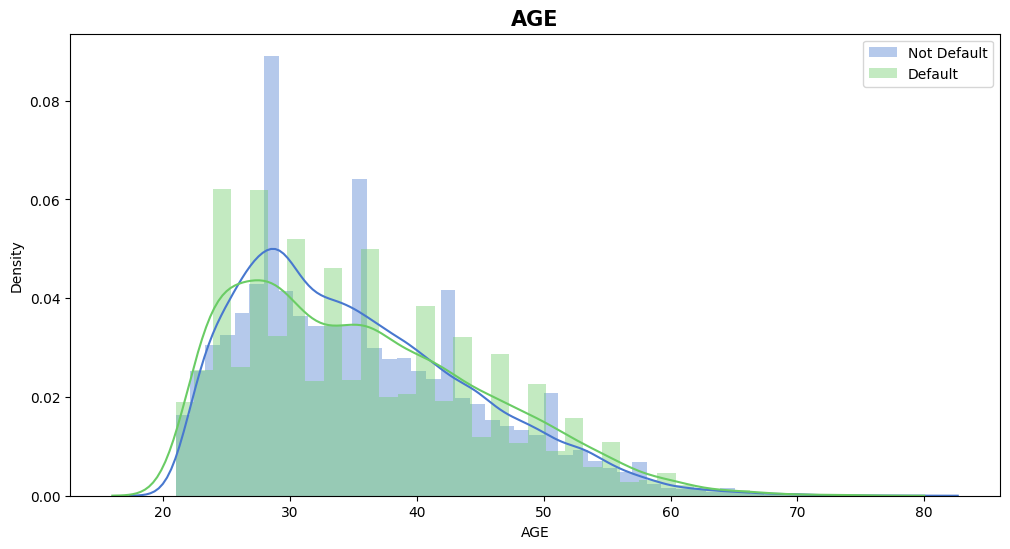

In [272]:
plt.figure(figsize=(12,6))
dist_plot('AGE')

- The distribution of Non Defaulter and Defaulter with respect to Age remain almost same.

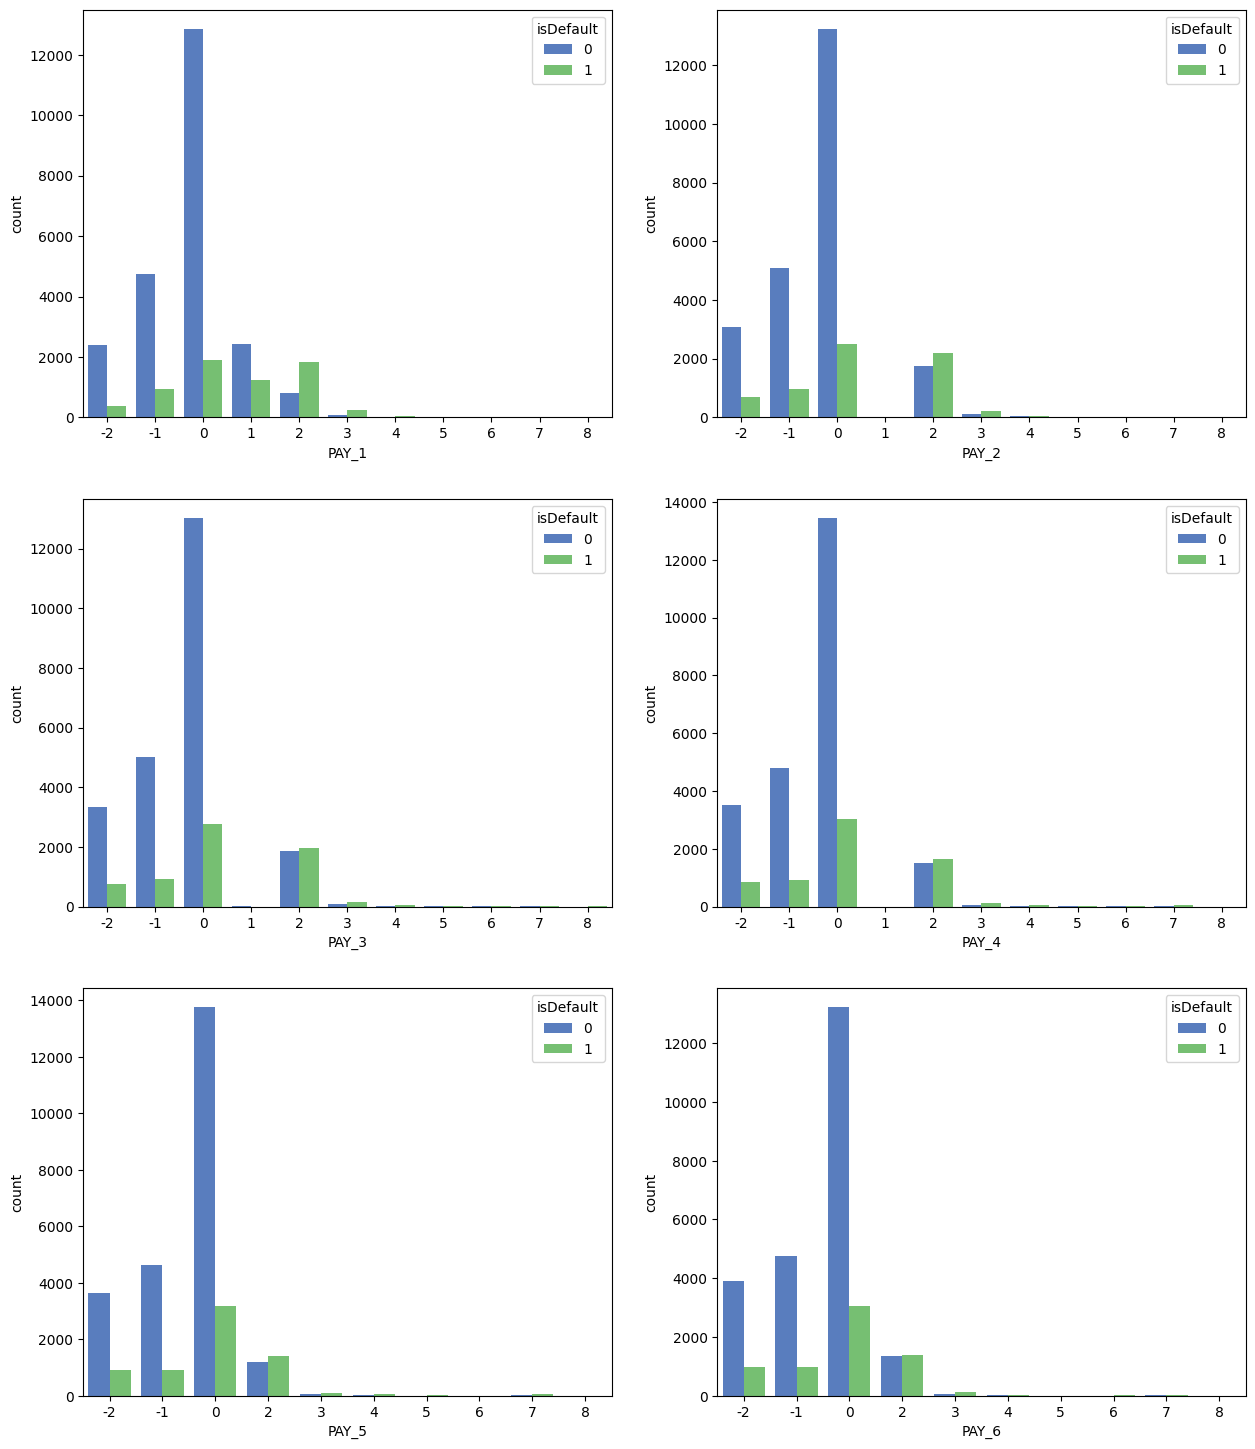

In [273]:
df_pay = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

plt.figure(figsize=(15,18))
for i in range(len(df_pay)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=df_pay[i],hue='isDefault',data=df)

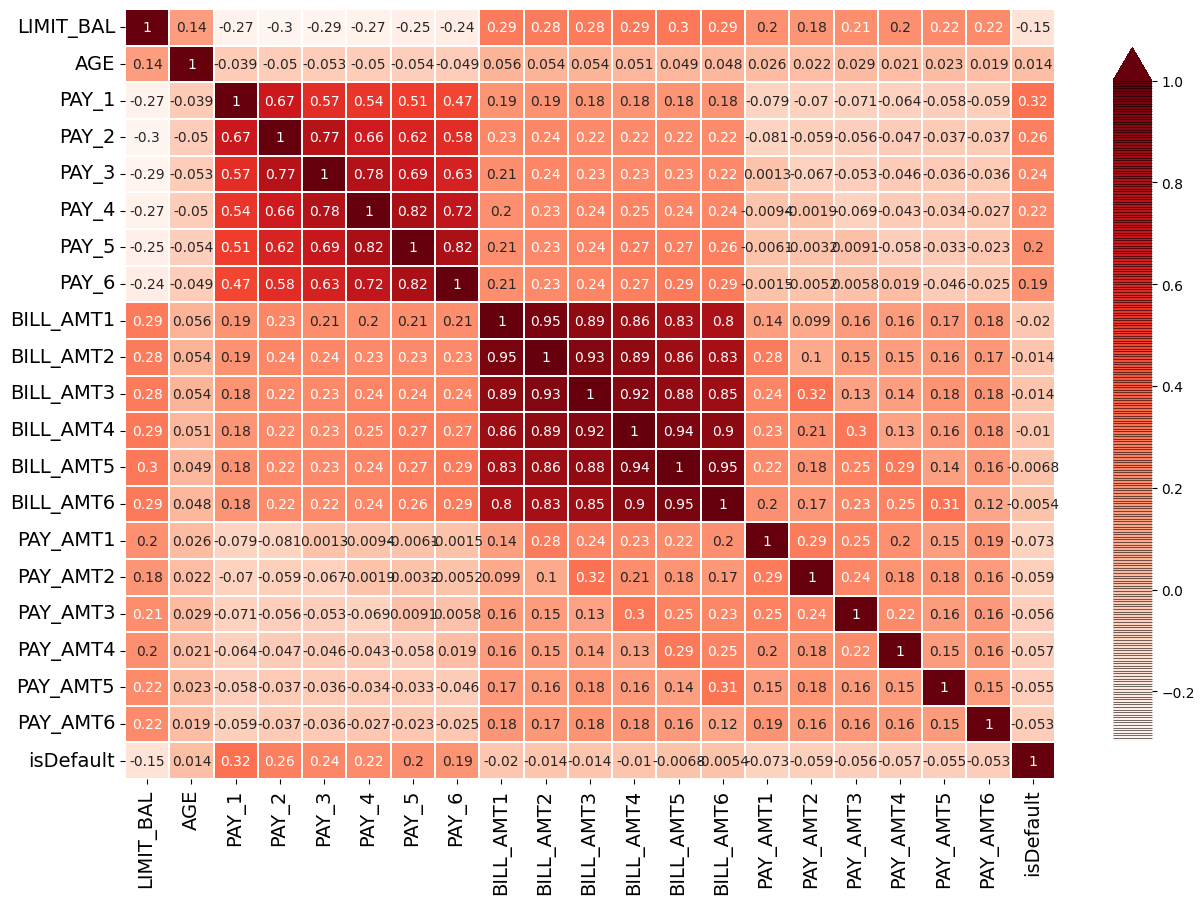

In [274]:
plt.figure(figsize = (15,10))
cbar_kws={'orientation':'vertical', 'shrink':0.9,'extend':'max',
          'extendfrac':0.05, 'drawedges':True, 'pad':0.05, 'aspect':18}
sns.heatmap(df.corr(), annot = True, cmap = 'Reds', linecolor = 'w', linewidth = 0.2, cbar_kws = cbar_kws)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

## 5. Data Preprocessing

- We have "sex","education" and "marriage" are as categorical features. So by using one hot encoding convert them into numerical features.

In [275]:
df = pd.get_dummies(df,['SEX','EDUCATION','MARRIAGE'])
df.drop(columns=['SEX_male','EDUCATION_others','MARRIAGE_others'],inplace=True)
df.rename({'SEX_female':'SEX',
           'EDUCATION_graduate school' : 'GRADUATE_SCHOOL',
           'EDUCATION_high school':'HIGH_SCHOOL',
           'EDUCATION_university':'UNIVERSITY',
           'MARRIAGE_married':'MARRIED',
           'MARRIAGE_single':'SINGLE'},axis=1,inplace=True)

- As we see eariler that our data is Imbalanced so we can implement some under sampling as well as over sampling

In [276]:
x = df[['LIMIT_BAL','AGE','PAY_1',\
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',\
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',\
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
y = df['isDefault']

## 6. Model Training

In [277]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

X_train.shape,y_train.shape

((21000, 20), (21000,))

In [278]:
min_max_scaler = MinMaxScaler()
X_train= min_max_scaler.fit_transform(X_train)
X_test=min_max_scaler.transform(X_test)

### SMOTE : Over Sampling Technique

In [279]:
sm=SMOTE()
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

print(f'before SMOTE sampling : {Counter(y_train)}')
print(f'aftere SMOTE sampling : {Counter(y_train_sm)}')

before SMOTE sampling : Counter({0: 16304, 1: 4696})
aftere SMOTE sampling : Counter({0: 16304, 1: 16304})


### Model Evalution

In [309]:
def model_evaluation(X_train,X_test,y_train,y_test,model):
    
    # model fitting
    model.fit(X_train_sm, y_train_sm)
    
    # Obtain the predicted values and probabilities from the model
    y_test_pred = model.predict(X_test)
    y_test_pred_probs = model.predict_proba(X_test)
    
    acc = metrics.accuracy_score(y_test, y_test_pred)
    precision = metrics.precision_score(y_test, y_test_pred)
    recall = metrics.recall_score(y_test, y_test_pred)
    f1 = metrics.f1_score(y_test, y_test_pred)
    roc_auc =  metrics.roc_auc_score(y_test, y_test_pred_probs[:, 1])

    ## Plot confusion matrix
    plt.figure(figsize=(10,5))
        
    test_matrix = metrics.confusion_matrix(y_test, y_test_pred)    
    names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    test_percent = [
        "{0:.2%}".format(value) for value in test_matrix.flatten() / np.sum(test_matrix)
    ]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(names, test_percent)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.title(f"Confusion Matrix of {type(model).__name__}", fontsize=14)
    sns.heatmap(test_matrix, annot=labels, fmt="", cmap="Blues")
    

    return acc,precision,recall,f1,roc_auc

## Implementing Logistic Regression 

#### Without Parameter Tuning

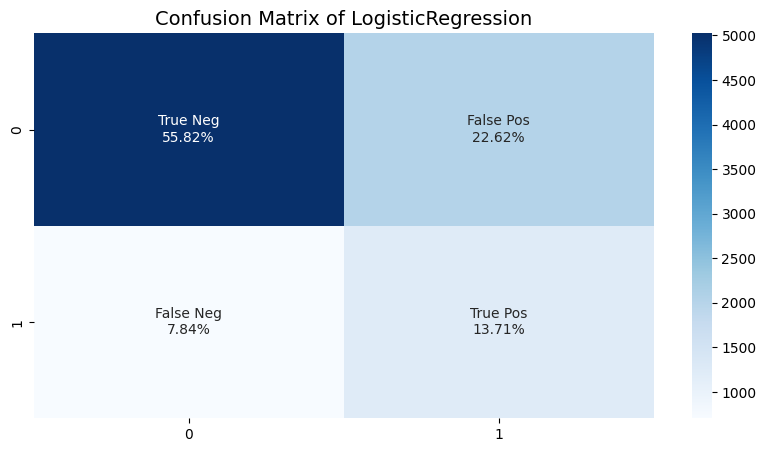

In [306]:
log_class = LogisticRegression()

acc,precision,recall,f1,roc_auc = model_evaluation(X_train,X_test,y_train,y_test,log_class)

In [307]:
# Storing model results in a dataframe for comparison
model_results = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC_ROC"])

model = pd.DataFrame(
    [["Logistic Regression without tuning", acc*100, precision, recall, f1, roc_auc]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC_ROC"],
)
model_results = model_results.append(model, ignore_index=True)

#### With Parameter Tuning

In [285]:
grid={'C' : [0.001,0.01,0.1,1,10,100,1000],
      "penalty" : ['l1','l2']}

cv = KFold(n_splits=10)

lr_clf=GridSearchCV(log_class,grid,n_jobs=-1,cv=cv,verbose=3,scoring='recall')

Fitting 10 folds for each of 14 candidates, totalling 140 fits


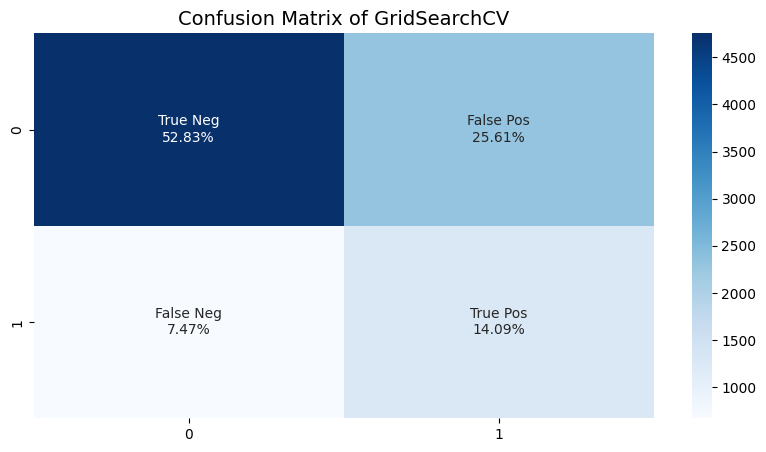

In [286]:
acc,precision,recall,f1,roc_auc = model_evaluation(X_train,X_test,y_train,y_test,lr_clf)

In [287]:
print(lr_clf.best_params_)

{'C': 1000, 'penalty': 'l2'}


In [288]:
model = pd.DataFrame(
    [["Logistic Regression with tuning", acc*100, precision, recall, f1, roc_auc]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC_ROC"],
)
model_results = model_results.append(model, ignore_index=True)

## Implementing Random Forest

#### Without Parameter Tuning

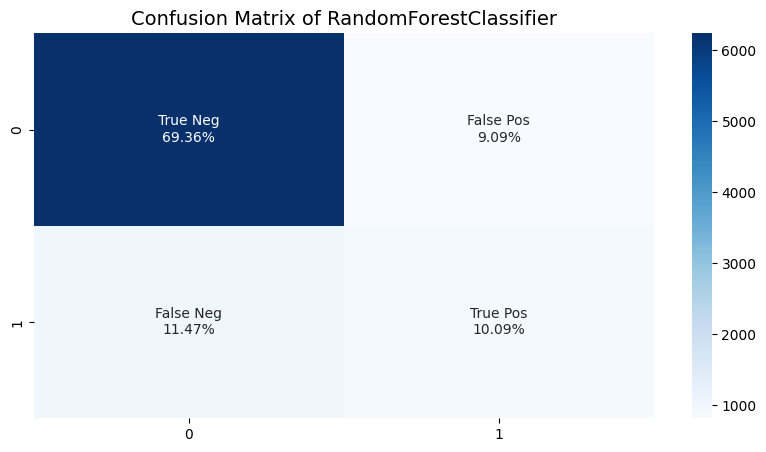

In [289]:
rf = RandomForestClassifier()

acc,precision,recall,f1,roc_auc = model_evaluation(X_train,X_test,y_train,y_test,rf)

In [290]:
model = pd.DataFrame(
    [["Random Forest without tuning", acc*100, precision, recall, f1, roc_auc]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC_ROC"],
)
model_results = model_results.append(model, ignore_index=True)

#### With Parameter Tuning

In [291]:
# Setting up a parameter grid for hyperparameter tuning

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(0, 25, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 4, 6, 8, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [292]:
rf_random = RandomizedSearchCV(rf, random_grid, n_iter = 10, cv = 5, scoring='recall', verbose=2, random_state=0, n_jobs = -1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


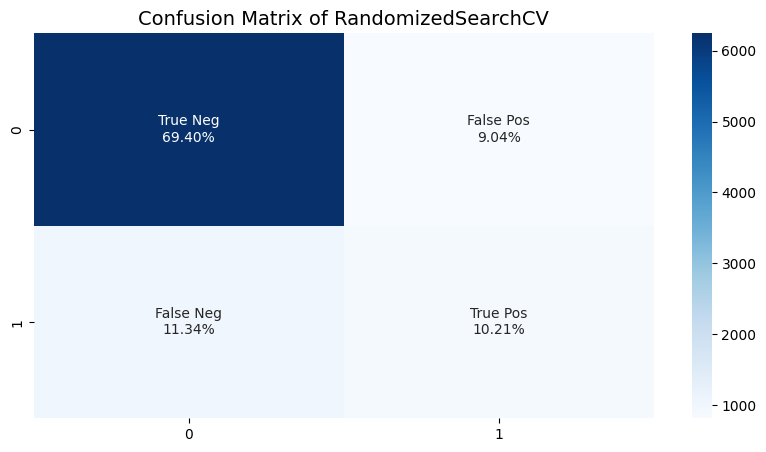

In [293]:
acc,precision,recall,f1,roc_auc = model_evaluation(X_train,X_test,y_train,y_test,rf_random)

In [294]:
print(rf_random.best_params_)

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


In [295]:
model = pd.DataFrame(
    [["Random Forest with tuning", acc*100, precision, recall, f1, roc_auc]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC_ROC"],
)
model_results = model_results.append(model, ignore_index=True)

## Implementing XgBoost

#### Without Parameter Tuning

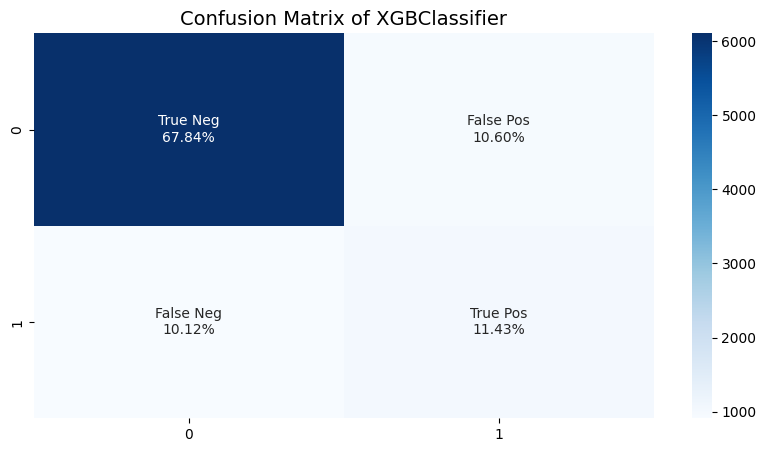

In [296]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=0)

acc,precision,recall,f1,roc_auc = model_evaluation(X_train,X_test,y_train,y_test,xgb_model)

In [297]:
model = pd.DataFrame(
    [["xgboost without Tuning", acc*100, precision, recall, f1, roc_auc]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC_ROC"],
)
model_results = model_results.append(model, ignore_index=True)

#### With Parameter Tuning

In [298]:
xgb = xgb.XGBClassifier()

# Create the parameter grid
xgb_param_grid = {
    'clf__learning_rate': np.arange(.05, 1, .05),
    'clf__max_depth': np.arange(3, 10, 1),
    'clf__n_estimators': np.arange(50, 200, 50)
}

# Perform RandomizedSearchCV
randomised_xgb = RandomizedSearchCV(estimator=xgb, n_iter=2, scoring='roc_auc', verbose=1,
                                        cv=2, param_distributions=xgb_param_grid)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[18:59:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__n_estimators" } are not used.

[18:59:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__n_estimators" } are not used.

[18:59:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__n_estimators" } are not used.

[18:59:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "clf__learning_rate", "clf__ma

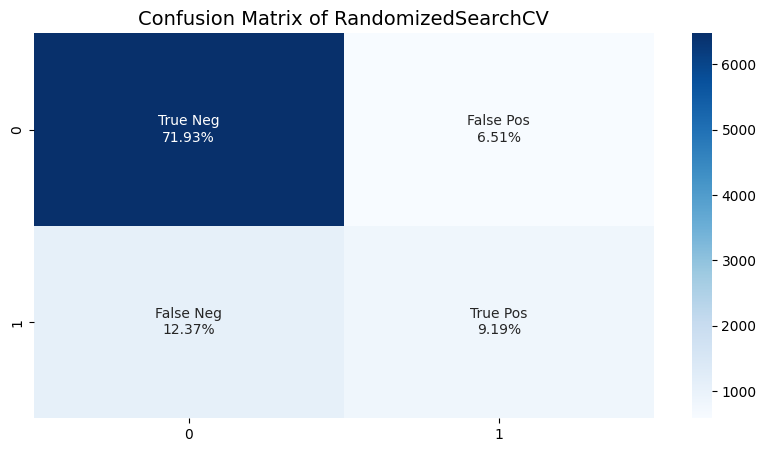

In [299]:
acc,precision,recall,f1,roc_auc = model_evaluation(X_train,X_test,y_train,y_test,randomised_xgb)

In [300]:
print(randomised_xgb.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              clf__learning_rate=0.5, clf__max_depth=7, clf__n_estimators=100,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, ...)


In [301]:
model = pd.DataFrame(
    [["xgboost with Tuning", acc*100, precision, recall, f1, roc_auc]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC_ROC"],
)
model_results = model_results.append(model, ignore_index=True)

## Comparison of Model Performance

In [302]:
model_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC_ROC
0,Logistic Regression without tuning,69.533333,0.377370,0.636082,0.473704,0.719613
1,Logistic Regression with tuning,66.922222,0.354884,0.653608,0.460004,0.721219
2,Random Forest without tuning,79.444444,0.526072,0.468041,0.495363,0.750763
3,Random Forest with tuning,79.611111,0.530294,0.473711,0.500408,0.751946
4,xgboost without Tuning,79.277778,0.518911,0.530412,0.524599,0.765345
5,xgboost with Tuning,81.122222,0.585280,0.426289,0.493290,0.757251


In [319]:
## LogReg without tuning
y_pred_proba_LG = log_class.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_LG)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_LG)

## LogReg with tuning
y_pred_proba_LGT = lr_clf.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba_LGT)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_LGT)

## RandomForest without tuning
y_pred_proba_RF = rf.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba_RF)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_RF)

## RandomForest with tuning
y_pred_proba_RFT = rf_random.predict_proba(X_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test,  y_pred_proba_RFT)
auc4 = metrics.roc_auc_score(y_test, y_pred_proba_RFT)

## xgboost without tuning
y_pred_proba_XG = xgb_model.predict_proba(X_test)[::,1]
fpr5, tpr5, _ = metrics.roc_curve(y_test,  y_pred_proba_XG)
auc5 = metrics.roc_auc_score(y_test, y_pred_proba_XG)

## LogReg with tuning
y_pred_proba_XGT = randomised_xgb.predict_proba(X_test)[::,1]
fpr6, tpr6, _ = metrics.roc_curve(y_test,  y_pred_proba_XGT)
auc6 = metrics.roc_auc_score(y_test, y_pred_proba_XGT)

Text(0.5, 1.0, 'ROC')

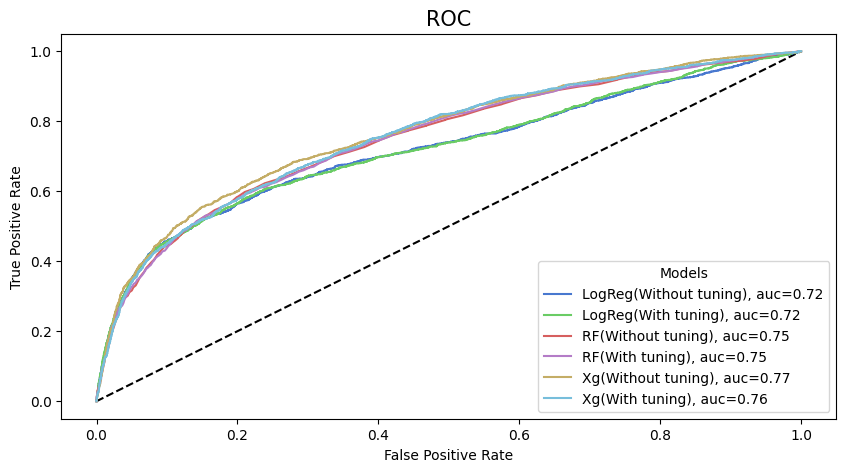

In [320]:
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr1,tpr1,label="LogReg(Without tuning), auc="+str(round(auc1,2)))

plt.plot(fpr2,tpr2,label="LogReg(With tuning), auc="+str(round(auc2,2)))

plt.plot(fpr3,tpr3,label="RF(Without tuning), auc="+str(round(auc3,2)))

plt.plot(fpr4,tpr4,label="RF(With tuning), auc="+str(round(auc4,2)))

plt.plot(fpr5,tpr5,label="Xg(Without tuning), auc="+str(round(auc5,2)))

plt.plot(fpr6,tpr6,label="Xg(With tuning), auc="+str(round(auc6,2)))

plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)

## Final Model

In [323]:
model = xgb_model

In [324]:
pickle.dump(model,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))